In [1]:
#!pip install tensorflow==2.2

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.10.1'

In [4]:
#Checking if GPU is enabled
tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU') 

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[]

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
# Data Augmentaion - Creating more data from exisiting data

In [18]:
batch_size=16
training_data_generator= ImageDataGenerator(rescale=1./255, horizontal_flip = True, vertical_flip = True, shear_range=0.2, zoom_range = 0.2, width_shift_range=0.2, height_shift_range = 0.2, 
                                           validation_split=0.1)

In [8]:
#dividing the data into training and validation

In [19]:
train = training_data_generator.flow_from_directory(r'E:\archive (2)\training_data', target_size=(256,256), color_mode = 'rgb', 
                                                    class_mode = 'binary', batch_size=batch_size, subset='training')

validation = training_data_generator.flow_from_directory(r'E:\archive (2)\training_data', target_size=(256,256), color_mode = 'rgb', 
                                                    class_mode = 'binary', batch_size=batch_size, subset='validation')

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


In [20]:
## Make CNN

In [21]:
#initializing CNN
cnn = tf.keras.models.Sequential()

#adding first layer

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3,padding = 'same', activation = 'relu', input_shape=[256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

In [22]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [23]:
# adding 2nd layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size = 3,padding = 'same', activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

In [24]:
# adding 3rd layer
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size = 3,padding = 'same', activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

In [25]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)     

In [26]:
# Flatenning

cnn.add(tf.keras.layers.Flatten())

##Fully connected layer
cnn.add(tf.keras.layers.Dense(units = 128, activation='relu'))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))


In [27]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)     

In [32]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'E:\archive (2)\models\fire_and_smoke_model.h5',
                                             monitor='val_loss', mode='min',
                                             save_best_only=True)
callbacks=checkpoint

In [31]:
# Train our CNN model
#Compile and train

cnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit_generator(train,validation_data = validation, epochs=1, steps_per_epoch=train.samples//batch_size,
                 validation_steps=validation.samples//batch_size,
                 callbacks=callbacks)

<ipython-input-31-9573960e3540>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train,validation_data = validation, epochs=1, steps_per_epoch=train.samples//batch_size,


772/772 [==============================] - 1720s 2s/step - loss: 0.0610 - accuracy: 0.9830 - val_loss: 0.0343 - val_accuracy: 0.9904


In [33]:
from tensorflow.keras.models import load_model
cnn=load_model(r'E:\archive (2)\models\fire_and_smoke_model.h5')

In [34]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)     

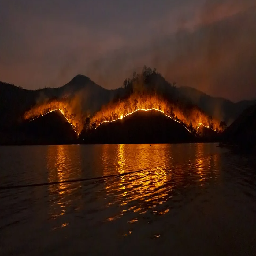

In [57]:
# Testing the model
import numpy as np
from tensorflow.keras.preprocessing import image

image_test=r'E:\archive (2)\training_data\fire\1.png'
test_image=image.load_img(image_test, target_size=(256,256))
test_image

In [58]:
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image

array([[[0.25490198, 0.22745098, 0.24705882],
        [0.25490198, 0.22745098, 0.24313726],
        [0.2627451 , 0.22352941, 0.23921569],
        ...,
        [0.33333334, 0.23921569, 0.21568628],
        [0.33333334, 0.23921569, 0.20784314],
        [0.34117648, 0.23921569, 0.2       ]],

       [[0.2509804 , 0.22352941, 0.23921569],
        [0.25490198, 0.22745098, 0.23921569],
        [0.2627451 , 0.22745098, 0.23137255],
        ...,
        [0.3372549 , 0.23921569, 0.20784314],
        [0.3372549 , 0.23921569, 0.2       ],
        [0.34117648, 0.23921569, 0.19607843]],

       [[0.2509804 , 0.22352941, 0.23921569],
        [0.25490198, 0.22745098, 0.23921569],
        [0.25882354, 0.22352941, 0.22352941],
        ...,
        [0.34117648, 0.23921569, 0.20784314],
        [0.34117648, 0.23921569, 0.2       ],
        [0.34117648, 0.23921569, 0.19215687]],

       ...,

       [[0.10196079, 0.07058824, 0.05490196],
        [0.10588235, 0.07450981, 0.05882353],
        [0.09803922, 0

In [59]:
test_image=np.expand_dims(test_image,axis=0)
test_image

array([[[[0.25490198, 0.22745098, 0.24705882],
         [0.25490198, 0.22745098, 0.24313726],
         [0.2627451 , 0.22352941, 0.23921569],
         ...,
         [0.33333334, 0.23921569, 0.21568628],
         [0.33333334, 0.23921569, 0.20784314],
         [0.34117648, 0.23921569, 0.2       ]],

        [[0.2509804 , 0.22352941, 0.23921569],
         [0.25490198, 0.22745098, 0.23921569],
         [0.2627451 , 0.22745098, 0.23137255],
         ...,
         [0.3372549 , 0.23921569, 0.20784314],
         [0.3372549 , 0.23921569, 0.2       ],
         [0.34117648, 0.23921569, 0.19607843]],

        [[0.2509804 , 0.22352941, 0.23921569],
         [0.25490198, 0.22745098, 0.23921569],
         [0.25882354, 0.22352941, 0.22352941],
         ...,
         [0.34117648, 0.23921569, 0.20784314],
         [0.34117648, 0.23921569, 0.2       ],
         [0.34117648, 0.23921569, 0.19215687]],

        ...,

        [[0.10196079, 0.07058824, 0.05490196],
         [0.10588235, 0.07450981, 0.05882353]

In [60]:
result= np.argmax(cnn.predict(test_image), axis=-1)
#classes_x=np.argmax(result,axis=1)

1/1 [==============================] - 0s 469ms/step


In [61]:
result[0]
if(result[0]==0):
    print('It is fire')
else:
    print('It is smoke')

It is fire


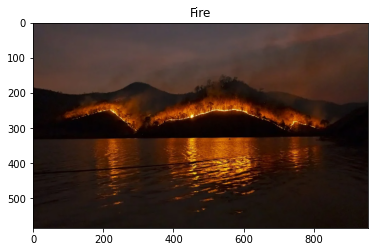

In [66]:
import matplotlib.pyplot as plt
import PIL


Categories=['Fire', 'Smoke']

image_show=PIL.Image.open(image_test)
plt.imshow(image_show)

plt.title(Categories[int(result[0])])
plt.show()